In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# BASIC SUBPLOTS

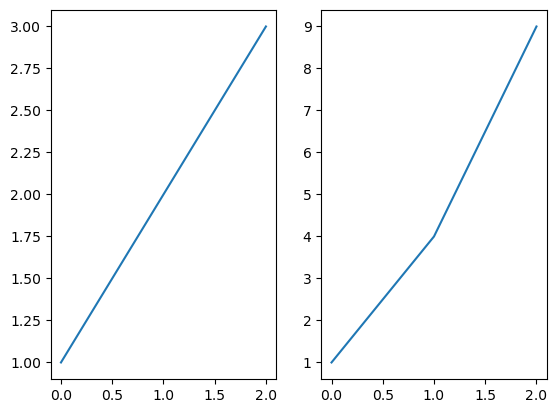

In [4]:
fig = plt.figure(2)

x = [0, 1, 2]

data = [1, 2, 3]
data2 = [1, 4, 9]

ax = fig.add_subplot(121) # 1row, 2column, index_position= 1
ax2 = fig.add_subplot(122) # 1row, 2column, index_position= 2

ax.plot(data)
ax2.plot(x, data2)

plt.show()

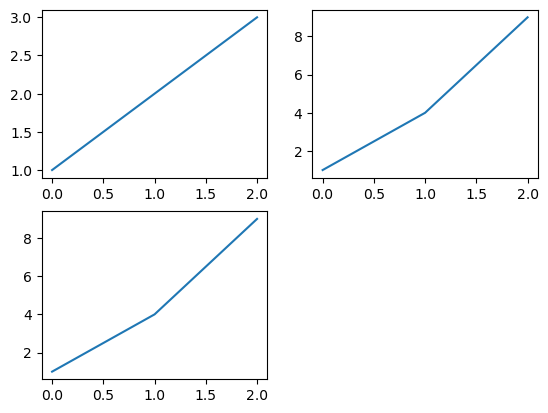

In [6]:
fig = plt.figure(3)

x = [0, 1, 2]

data = [1, 2, 3]
data2 = [1, 4, 9]

ax = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)

ax.plot(x, data)
ax2.plot(x, data2)
ax3.plot(x, data2)

plt.show()

### Creating two scatter plots

In [7]:
housing_raw = pd.read_csv(
    "/Users/parvezshahshaik/Documents/Github/analyzing_global_coffee_market/Data/housing_data.csv",
    parse_dates = ["period_begin", "period_end"],
    dtype ={"total_homes_sold": "Int32", "region_name": "category"}
)

In [20]:
ca_housing = (
    housing_raw.
    loc[(housing_raw["region_name"].str.contains("CA"))]
    .assign(region_name = housing_raw["region_name"].str[0: -11])
    .set_index("period_begin").sort_index()
    
)
    

ca_housing_pivot = ca_housing.pivot_table(index= "period_begin",
                                         columns= "region_name",
                                         values= "median_active_list_price").assign(
                                         CA_average = lambda x: x.mean(axis=1))


ca_housing_markets = ca_housing_pivot.loc[:, ["San Francisco",
                                               "Los Angeles",
                                               "San Diego",
                                               "Tulare"                     
                                              ]]
ca_housing_markets.head()

region_name,San Francisco,Los Angeles,San Diego,Tulare
period_begin,,,,
2017-01-02,1229018.7,611561.0,618570.8,225395.8
2017-01-09,1233393.7,614061.0,621737.5,227729.1
2017-01-16,1239977.0,617311.0,625820.8,229060.4
2017-01-23,1247977.0,620644.3,629491.6,229806.2
2017-01-30,1253310.4,624541.6,632824.0,230139.5


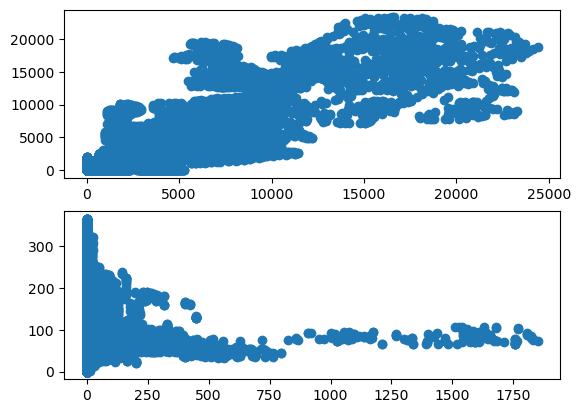

In [21]:
# Assuming housing_raw is your DataFrame containing the data
# Fill NaN values with 0 or appropriate values for numerical columns
housing_raw['total_homes_sold'].fillna(0, inplace=True)
housing_raw['inventory'].fillna(0, inplace=True)
housing_raw['months_of_supply'].fillna(0, inplace=True)
housing_raw['age_of_inventory'].fillna(0, inplace=True)

# Convert categorical columns to numeric if required
housing_raw['total_homes_sold'] = pd.to_numeric(housing_raw['total_homes_sold'], errors='coerce')
housing_raw['inventory'] = pd.to_numeric(housing_raw['inventory'], errors='coerce')
housing_raw['months_of_supply'] = pd.to_numeric(housing_raw['months_of_supply'], errors='coerce')
housing_raw['age_of_inventory'] = pd.to_numeric(housing_raw['age_of_inventory'], errors='coerce')

# Now, plot after handling missing values and ensuring numeric data
fig, ax = plt.subplots(2, 1)

# Plot 1: total_homes_sold vs. inventory
ax[0].scatter(housing_raw['total_homes_sold'], housing_raw['inventory'])

# Plot 2: months_of_supply vs. age_of_inventory
ax[1].scatter(housing_raw['months_of_supply'], housing_raw['age_of_inventory'])

plt.show()


# MORE SUBPLOTS

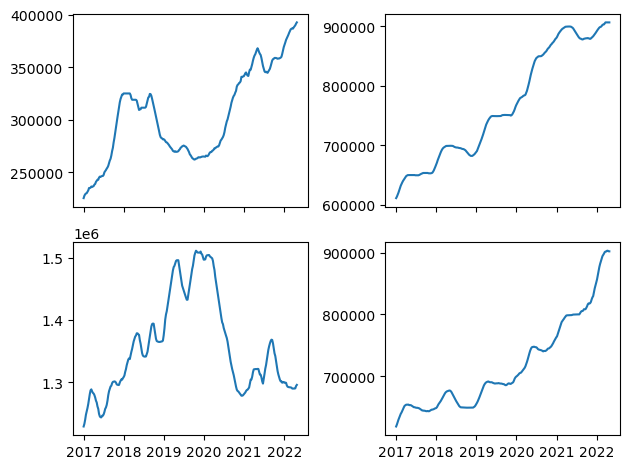

In [29]:
fig, ax = plt.subplots(2,2, 
                     sharex = 'all', #x -axis is shared in all charts
                     #sharey = 'all'
                     )

ax[0][0].plot(ca_housing_markets.index, ca_housing_markets["Tulare"])

ax[0][1].plot(ca_housing_markets.index, ca_housing_markets["Los Angeles"])
ax[1][0].plot(ca_housing_markets.index, ca_housing_markets["San Francisco"])
ax[1][1].plot(ca_housing_markets.index, ca_housing_markets["San Diego"])

plt.tight_layout() #this makes sure the axis wont over lap with other charts

### Iterate and add

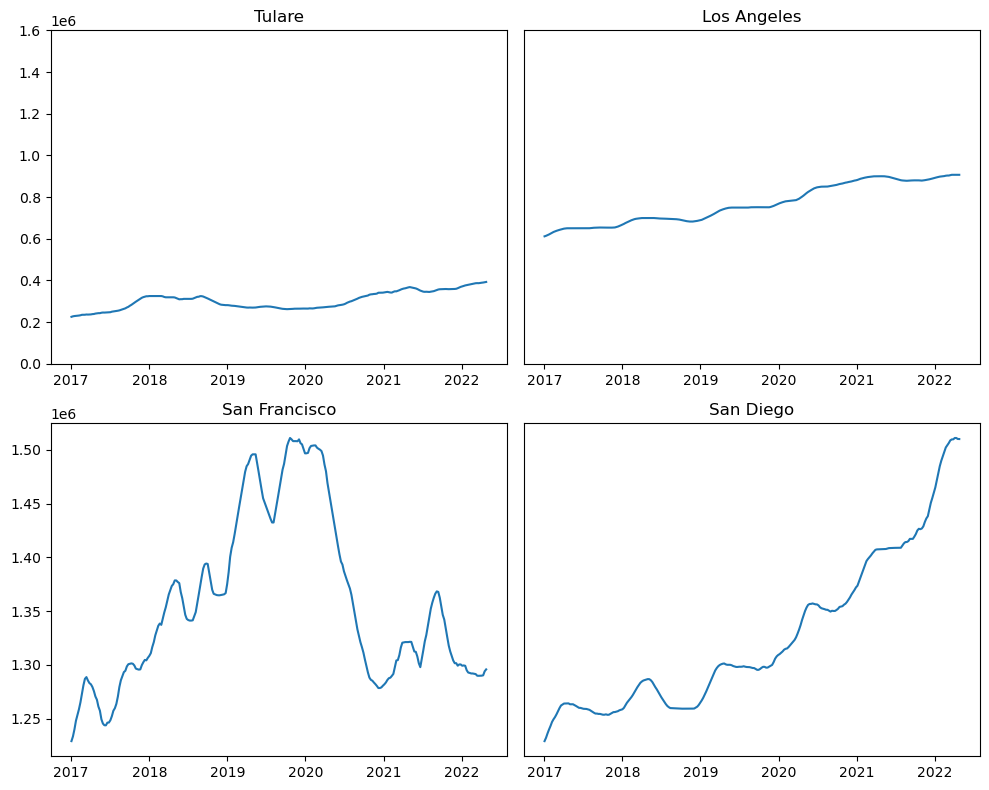

In [38]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

plot_list = ["Tulare", "Los Angeles", "San Francisco", "San Diego"]

for i, city in enumerate(plot_list):
    row = i // 2
    col = i % 2
    
    ax[row, col].plot(ca_housing_markets.index, ca_housing_markets[city])
    ax[row, col].set_title(city)
    
    # Set y-axis limit for specific plots
    if city in ["Tulare", "Los Angeles"]:
        ax[row, col].set_ylim(0, 1600000)
    
    # Hide y-axis ticks for alternate plots
    if i % 2 != 0:
        ax[row, col].set_yticks([])

plt.tight_layout()
plt.show()


# ASSAIGNMENT 6: SUBPLOTS
* Plot the distribution of lodging revenue for our top 5 countries by revenue("PRT", "ESP", "FRA", "DEU", "GBR").

### Limit Data to Bookings with RoomNights < 15
* Make sure to share both x and y axes and give them titles!
<br></br>
* Remove the extra chart with `ax[row, col].set_axis_off()`if using plt.subplots()

In [40]:
hotels = pd.read_excel("/Users/parvezshahshaik/Documents/Github/analyzing_global_coffee_market/Data/HotelCustomersDataset.xlsx")

hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


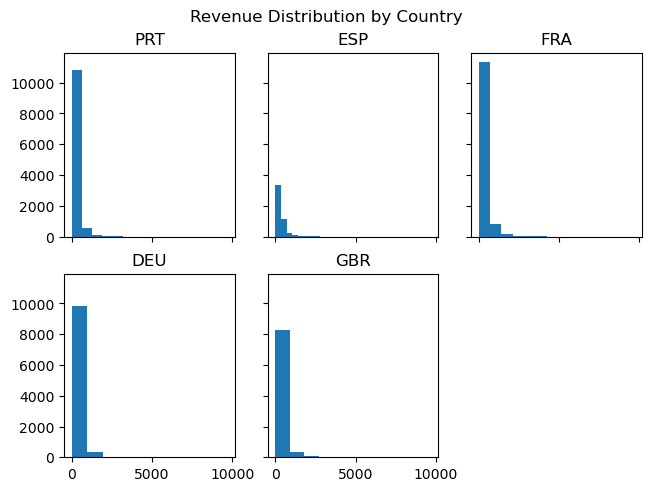

In [43]:
fig, ax = plt.subplots(2, 3, constrained_layout=True, sharex="all", sharey="all")
# Create a 2x3 grid of subplots for plotting

fig.suptitle("Revenue Distribution by Country")
# Add a main title for the entire figure

# Plotting histograms for different nationalities' lodging revenue with room nights < 15

ax[0][0].hist(
    hotels.query("Nationality == 'PRT' and RoomNights < 15").loc[:, "LodgingRevenue"]
)
ax[0][0].set_title("PRT")
# Subplot for nationality 'PRT': histogram of lodging revenue where room nights are less than 15

ax[0][1].hist(
    hotels.query("Nationality == 'ESP' and RoomNights < 15").loc[:, "LodgingRevenue"]
)
ax[0][1].set_title("ESP")
# Subplot for nationality 'ESP': histogram of lodging revenue where room nights are less than 15

ax[0][2].hist(
    hotels.query("Nationality == 'FRA' and RoomNights < 15").loc[:, "LodgingRevenue"]
)
ax[0][2].set_title("FRA")
# Subplot for nationality 'FRA': histogram of lodging revenue where room nights are less than 15

ax[1][0].hist(
    hotels.query("Nationality == 'DEU' and RoomNights < 15").loc[:, "LodgingRevenue"]
)
ax[1][0].set_title("DEU")
# Subplot for nationality 'DEU': histogram of lodging revenue where room nights are less than 15

ax[1][1].hist(
    hotels.query("Nationality == 'GBR' and RoomNights < 15").loc[:, "LodgingRevenue"]
)
ax[1][1].set_title("GBR")
# Subplot for nationality 'GBR': histogram of lodging revenue where room nights are less than 15

ax[1,2].set_axis_off()
# Disable the third subplot in the second row (empty subplot)

plt.show()
# Display the plot


### Alternate Solution

AttributeError: 'GrouperView' object has no attribute 'join'

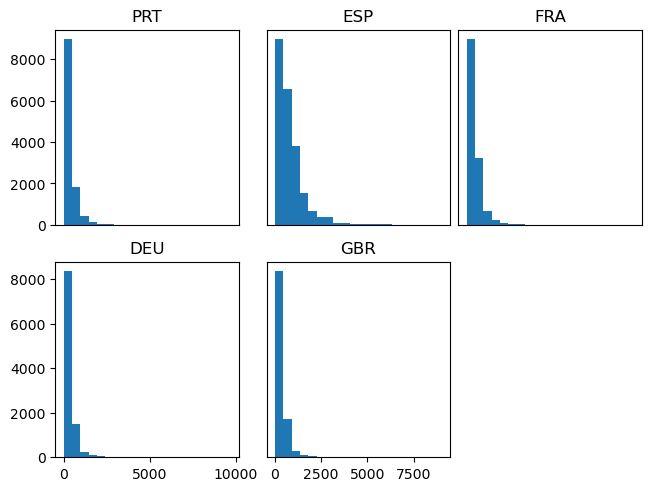

In [57]:
# TUTOR SOLUTION

country_list = ["PRT", "ESP", "FRA", "DEU", "GBR"]

ax_list= []

nrows, ncols = (2, 3)
fig = plt.figure(constrained_layout=True)

for i, country in enumerate(country_list):
    ax = fig.add_subplot(nrows, ncols, i+1)
    ax.hist(
        (hotels
        .query(f"Nationality == '{country}' & RoomNights < 15")
        .loc[:, "LodgingRevenue"]),
        bins=20
    )
    
    ax.set_title(f"{country}")
    ax_list.append(ax)
    
    if i % ncols !=0:
        ax.set_yticks([ ])
    
    if (i / ncols) < nrows - 1 :
        ax.set_xticks([ ])
        
ax_list[0].get_shared_x_axes().join(ax_list[0], *ax_list)
ax_list[0].get_shared_y_axes().join(ax_list[0], *ax_list)

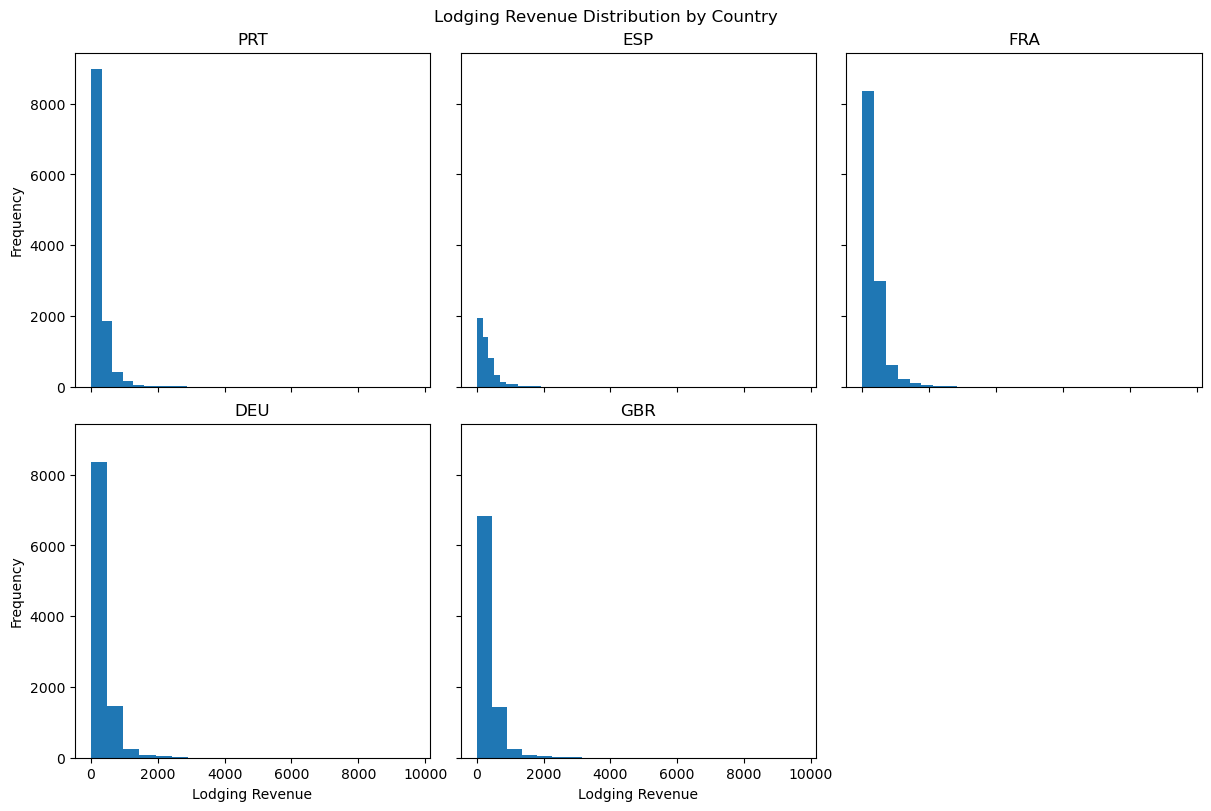

In [61]:
import matplotlib.pyplot as plt

# List of countries for plotting
country_list = ["PRT", "ESP", "FRA", "DEU", "GBR"]

# Calculate the number of plots, rows, and columns needed
num_plots = len(country_list)
num_rows = 2
num_cols = (num_plots + num_rows - 1) // num_rows

# Create subplots based on the number of rows and columns needed
fig, axs = plt.subplots(num_rows, num_cols, constrained_layout=True, figsize=(12, 8), sharex='all', sharey='all')
plt.suptitle('Lodging Revenue Distribution by Country')

# Loop through each country and plot its data
for i, country in enumerate(country_list):
    # Calculate row and column index for subplot placement
    row = i // num_cols
    col = i % num_cols
    current_ax = axs[row, col]  # Get the current subplot
    
    # Get data for the current country
    current_data = hotels.query(f"Nationality == '{country}' & RoomNights < 15").loc[:, "LodgingRevenue"]
    
    # Plot the data as a histogram in the current subplot
    current_ax.hist(current_data, bins=20)
    current_ax.set_title(f"{country}")  # Set the title for the subplot
    
    # Adjust axis labels for the last row and first column
    if row == num_rows - 1:
        current_ax.set_xlabel('Lodging Revenue')
    if col == 0:
        current_ax.set_ylabel('Frequency')
    
    # Hide x-axis labels for the upper row and y-axis labels for other columns
    if row == 0:
        current_ax.tick_params(axis='x', labelbottom=False)
    if col != 0:
        current_ax.tick_params(axis='y', labelleft=False)

# Remove excess empty subplots beyond the number of actual plots
if num_plots < num_rows * num_cols:
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axs.flatten()[i])

plt.show()

# PANDAS API METHOD SOLUTION FOR THE SAME PROBLEM

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

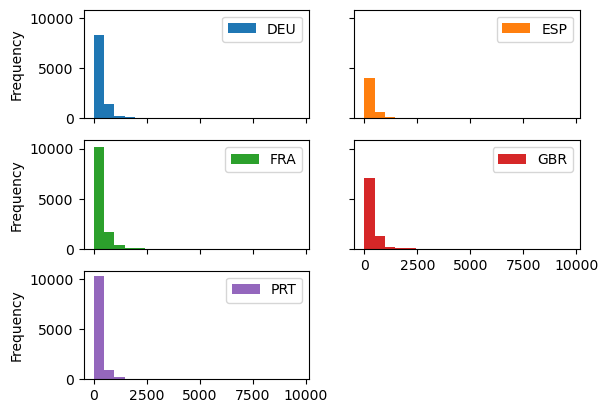

In [66]:
# Filtering the 'hotels' DataFrame based on country_list and room nights
hotel_filtered = hotels.query("Nationality in @country_list  and RoomNights < 15")

# Creating a pivot table to summarize LodgingRevenue by ID and Nationality
hotel_pivot = hotel_filtered.pivot_table(
    index="ID",
    columns="Nationality",
    values="LodgingRevenue"
)

# Plotting histograms for LodgingRevenue by Nationality using the pivot table
hotel_pivot.plot.hist(
    subplots=True,     # Generate subplots for each nationality
    bins=20,           # Define the number of bins for the histogram
    layout=(3, 2),     # Define the layout for the subplots (3 rows, 2 columns)
    sharex=True,       # Share the x-axis across all subplots
    sharey=True        # Share the y-axis across all subplots
)
